In [1]:
import numpy as np

import time

from sklearn.cluster import k_means
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture as EM

from utils import *
from utils_EM import *

from subsampling import *

from cem import *

## Mixture

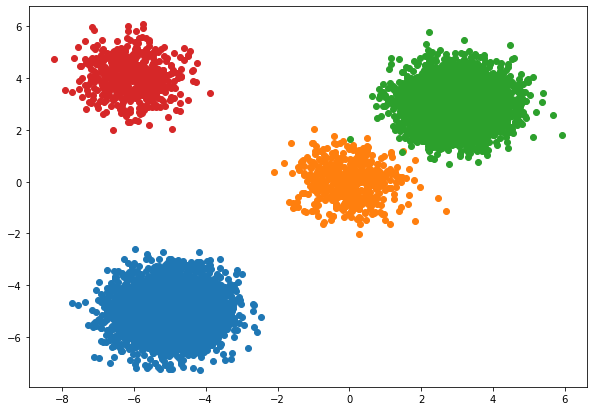

In [2]:
mus = np.array([[-5,-5],[0,0],[3,3],[-6,4]])
sigmas = [0.5*np.eye(2) for k in range(4)]
ps = [0.5,0.05,0.4,0.05]

gm = GaussianMixture(ps,mus,sigmas)
X,labels = generateMixture(10000,mus,sigmas,ps)

plt.figure(figsize=(10,7))
plt.scatter(X[labels==0][:,0],X[labels==0][:,1])
plt.scatter(X[labels==1][:,0],X[labels==1][:,1])
plt.scatter(X[labels==2][:,0],X[labels==2][:,1])
plt.scatter(X[labels==3][:,0],X[labels==3][:,1])
plt.show()

## Subsampling

In [3]:
a = 3

@numba.jit(nopython=True)
def h(x):
    return np.exp(-(np.linalg.norm(x)/a)**2)

@numba.jit(nopython=True)
def h2(x):
    return np.exp(-(np.linalg.norm(x)/a)**2)*np.cos(5*a*np.linalg.norm(x))

### Kernel: $k(x,y) = \exp\Big(-\frac{\|x-y\|^2}{a^2}\Big)$

134.69587969779968
2.316038131713867


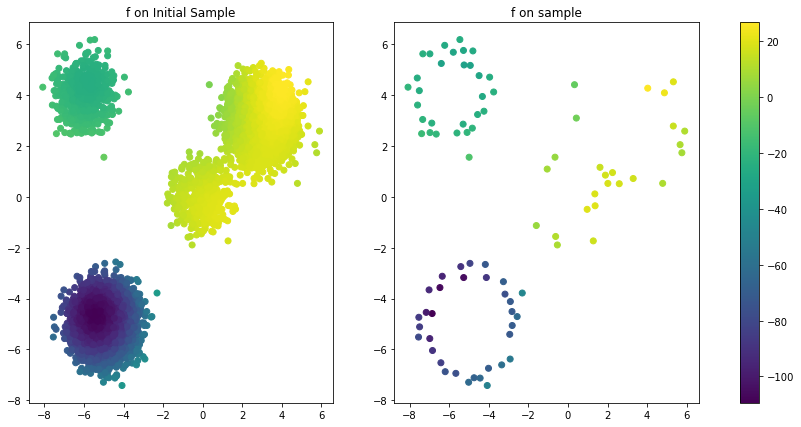

88
4970 33
459 11
4036 14
535 30


In [9]:
r = 4*a
b = a/10

subsampler = Subsampler(h,b,r)
start = time.time()
subsampler.fit(X)
print(time.time()-start)

start = time.time()
sample = subsampler.sample()
print(time.time()-start)

plotSubSample(subsampler)

labels2 = labels[subsampler.indices]

print(len(subsampler.indices))
print(len(labels[labels==0]),len(labels2[labels2==0]))
print(len(labels[labels==1]),len(labels2[labels2==1]))
print(len(labels[labels==2]),len(labels2[labels2==2]))
print(len(labels[labels==3]),len(labels2[labels2==3]))

### Kernel: $k(x,y)=\exp\Big(-\frac{\|x-y\|^2}{a^2}\Big)\cos(5a\|x-y\|)$

232.98547506332397
4.775318622589111


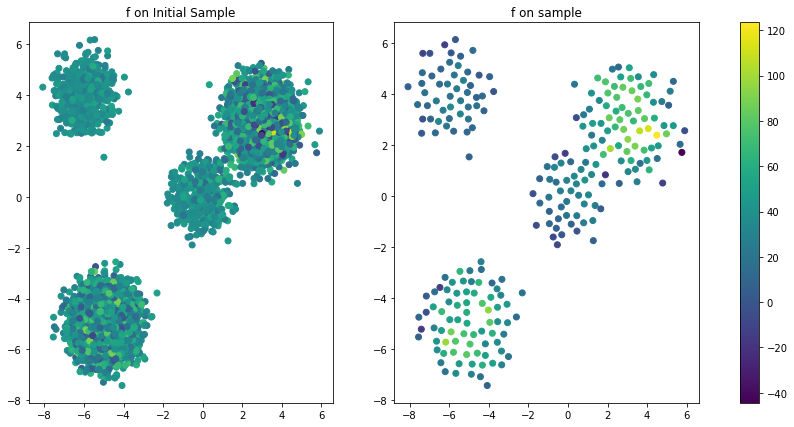

In [4]:
r = 4*a
b = a/10

subsampler = Subsampler(h2,b,r)
start = time.time()
subsampler.fit(X)
print(time.time()-start)

start = time.time()
sample = subsampler.sample()
print(time.time()-start)

plotSubSample(subsampler)

labels2 = labels[subsampler.indices]

print(len(subsampler.indices))
print(len(labels[labels==0]),len(labels2[labels2==0]))
print(len(labels[labels==1]),len(labels2[labels2==1]))
print(len(labels[labels==2]),len(labels2[labels2==2]))
print(len(labels[labels==3]),len(labels2[labels2==3]))

### Greedy Method

0.4889862537384033


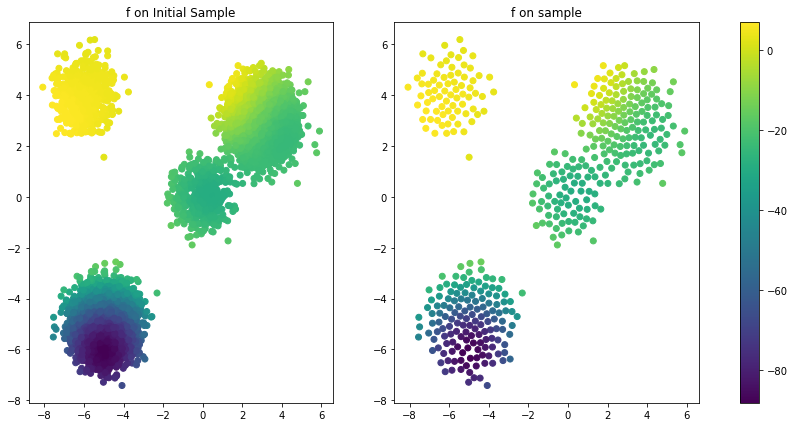

437
4970 143
459 73
4036 146
535 75


In [8]:
subsampler = Subsampler(h,b,r)
subsampler.fit(X)

start = time.time()
sample = subsampler.sample2()
print(time.time()-start)

plotSubSample(subsampler)

labels2 = labels[subsampler.indices]

print(len(subsampler.indices))
print(len(labels[labels==0]),len(labels2[labels2==0]))
print(len(labels[labels==1]),len(labels2[labels2==1]))
print(len(labels[labels==2]),len(labels2[labels2==2]))
print(len(labels[labels==3]),len(labels2[labels2==3]))

## EM Algorithms

### EM

Text(0.5, 1.0, 'Sample')

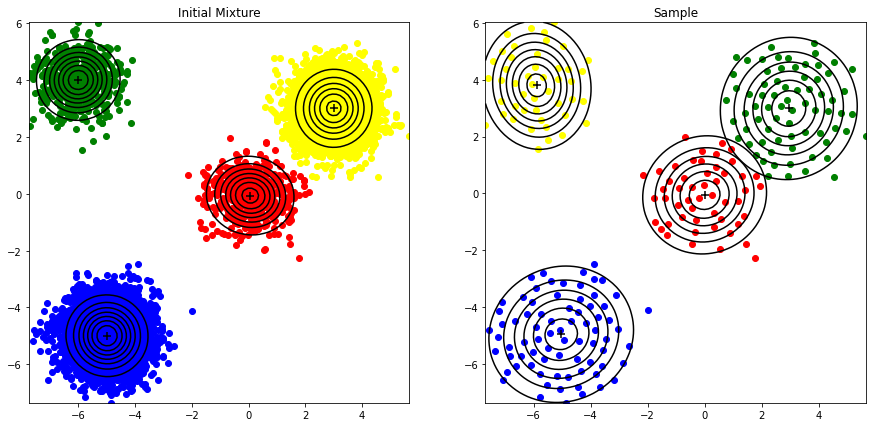

In [10]:
subsampler = Subsampler(h2,b,r)
subsampler.fit(X)
subsampler.sample()

clfAll = EM(n_components=4,covariance_type="full")
clfAll.fit(X)

clfSub = EM(n_components=4,covariance_type="full")
clfSub.fit(subsampler.samples)


fig,ax = plt.subplots(1,2,figsize=(15,7))

plot_ellipses(0,1,ax[0],4,clfAll.means_,clfAll.covariances_,clfAll.weights_,X=X)
ax[0].set_title("Initial Mixture")
plot_ellipses(0,1,ax[1],4,clfSub.means_,clfSub.covariances_,clfSub.weights_,X=subsampler.samples)
ax[1].set_title("Sample")

### CEM

/home/clement/Dropbox/MVA/Stage/Code/Main Codes/Rd/cem.py:18: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, F), array(float64, 2d, A))
  return (-(1/2)*diff.T@inv_sig@diff - (d/2)*np.log(2*np.pi) - (1/2)*np.log(det_sig))[0][0]
/home/clement/anaconda3/lib/python3.7/site-packages/numba/typing/npydecl.py:967: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, F), array(float64, 2d, A))
  warnings.warn(NumbaPerformanceWarning(msg))


C2 -41983.06346728472
C2 -40911.524372310174
C2 -39420.85475661048
C2 -37811.41998514476
C2 -37428.11371745255
C2 -37324.84087276377
C2 -37306.17632007216
C2 -37295.7091848012
C2 -37291.388261953085
C2 -37286.47023082717
C2 -37285.38665287534
C2 -37279.54790641695
C2 -37279.54790641695


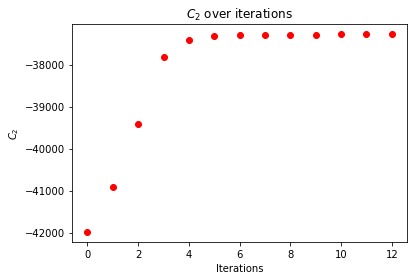

22.44520926475525


In [10]:
K = 4
cem = CEM(K)

alphas0 = np.ones(K)/K
sigmas0 = [np.eye(2) for k in range(K)]
mus0 = [np.random.rand(2) for k in range(K)]

start = time.time()
cem.fit(X,alphas0,mus0,sigmas0,plot=True)
print(time.time()-start)

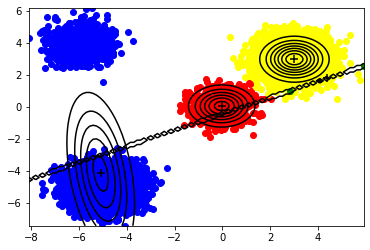

In [11]:
plot_ellipses(0,1,plt,K,cem.mus,cem.sigmas,cem.alphas,dico=cem.classes,X=X)

C2 -31450.677503265295
C2 -31443.250900312643
C2 -31442.84970024073
C2 -31442.76509149219
C2 -31442.76509149219


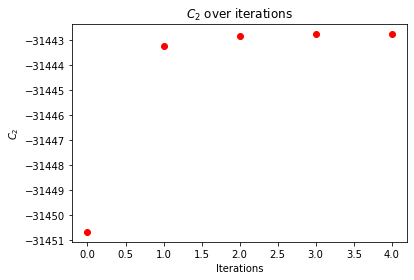

In [13]:
alphas0 = np.ones(K)/K
sigmas0 = [np.eye(2) for k in range(K)]
mus0,_,_ = k_means(X,K,max_iter=10)

cem = CEM(K)

cem.fit(X,alphas0,mus0,sigmas0,plot=True)

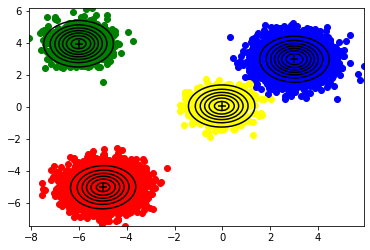

In [14]:
plot_ellipses(0,1,plt,K,cem.mus,cem.sigmas,cem.alphas,dico=cem.classes,X=X)

### OCEM

/home/clement/Dropbox/MVA/Stage/Code/Main Codes/Rd/cem.py:19: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, F), array(float64, 2d, A))
  return (-(1/2)*diff.T@inv_sig@diff - (d/2)*np.log(2*np.pi) - (1/2)*np.log(det_sig))[0][0]
/home/clement/anaconda3/lib/python3.7/site-packages/numba/typing/npydecl.py:967: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, F), array(float64, 2d, A))
  warnings.warn(NumbaPerformanceWarning(msg))


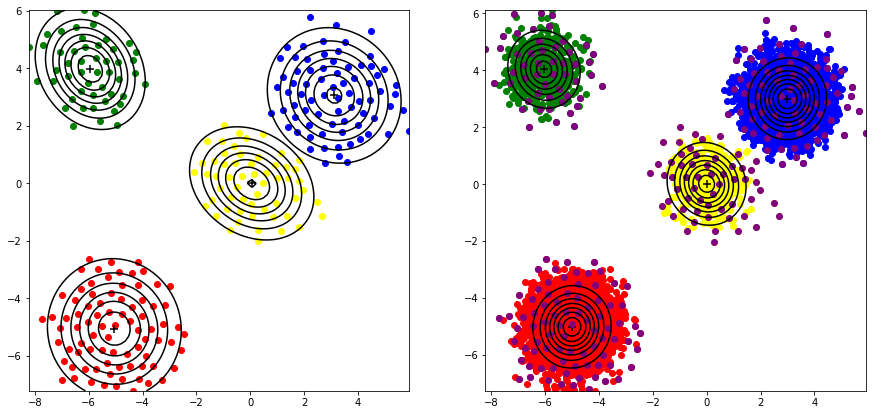

ARI 0.9996328280191258


In [5]:
init = "k-means++"

subsampler = Subsampler(h2,b,r)
subsampler.fit(X)
X0 = subsampler.sample()
inds = subsampler.indices

XX = X[[i for i in range(len(X)) if i not in inds]]

K = 4

alphas0 = np.ones(K)/K
sigmas0 = [np.eye(X.shape[1])/K for l in range(K)]
mus0,_,_ = k_means(X0,K,max_iter=10,n_init=10,init=init) 

alphas,mus,sigmas,classes,cem = onlineCEM(XX,X0,alphas0,mus0,sigmas0,K,plot=False,stop=True,n_iter=50)

plotOnlineCEM(X,K,alphas,mus,sigmas,inds,classes,cem)

print("ARI",adjusted_rand_score(labels,getClasses(X,inds,cem,classes)))